In [1]:
# install libraries
!pip install pandas scipy

In [2]:
# Load libraries and include 
# the line below to see the plots inside
# this notebook
%matplotlib inline

import pandas as pd
from scipy import stats
import numpy as np

In [3]:
# reads a .csv file
df = pd.read_csv('Data matrix from MZmine.csv')

# shows the head (first lines of the file) to observe the format
df.head()

,row ID,1,2,3,4,5,6,7,8,9,...,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384
0,row m/z,3.383416e+02,3.762595e+02,3.312843e+02,3.132738e+02,3.413051e+02,3.132737e+02,3.593156e+02,6.373054e+02,3.413051e+02,...,452.519139,458.472201,200.237387,532.358195,347.226553,676.334595,211.086462,415.206237,562.435864,391.202269
1,row retention time,1.781539e+01,9.519348e+00,1.469996e+01,1.470086e+01,1.627943e+01,1.442873e+01,1.627943e+01,1.570894e+01,1.600201e+01,...,19.304242,18.488792,8.220203,17.200402,14.343168,7.114758,12.897156,12.233278,19.868606,3.523073
2,SolBlk_1,1.640000e+08,2.490000e+08,1.770000e+08,1.410000e+08,6.860000e+07,1.230000e+07,7.470000e+07,5.010000e+07,1.470000e+07,...,0.000000,0.000000,15568.115000,51390.071000,86820.407500,0.000000,0.000000,0.000000,0.000000,0.000000
3,SolBlk_2,1.190000e+08,3.050000e+08,1.760000e+08,1.400000e+08,6.840000e+07,1.200000e+07,7.420000e+07,5.240000e+07,1.480000e+07,...,0.000000,0.000000,0.000000,170647.004000,91314.886500,0.000000,0.000000,0.000000,0.000000,0.000000
4,Blank_1,1.330000e+08,4.060000e+08,1.600000e+08,1.240000e+08,5.930000e+07,1.410000e+07,6.690000e+07,4.140000e+07,1.560000e+07,...,0.000000,0.000000,0.000000,8781.105000,61148.732500,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# Reads a .tsv file, the metadata saved from your excel file
meta = pd.read_csv('Metadata1.tsv', sep='\t')

meta.head()

,filename,ATTRIBUTE_SampleCode,ATTRIBUTE_Treatment
0,Sol_blank_1_P2-A-3_01_4617.mzXML,SolBlk_1,-
1,Sol_blank_2_P2-A-4_01_4618.mzXML,SolBlk_2,-
2,Blank-1_1_P2-A-5_01_4619.mzXML,Blank_1,-
3,Blank-1_2_P2-A-6_01_4620.mzXML,Blank_2,-
4,D_blank_1_P2-A-7_01_4621.mzXML,Dblank_1,-


In [5]:
# Count the values in each group
meta['ATTRIBUTE_SampleCode'].value_counts()

Blank_1       1
Blank_2       1
Neblank_1     1
NE_1          1
His_2         1
DHNblank_1    1
Dblank_1      1
DHNblank_2    1
SolBlk_1      1
NE_2          1
Bac_2         1
Hblank_2      1
His_1         1
Dblank_2      1
DNA_2         1
SolBlk_2      1
DHN_2         1
DNA_1         1
Dhblank_2     1
DHN_1         1
Dhblank_1     1
Bac_1         1
DH_1          1
Neblank_2     1
Hblank_1      1
DH_2          1
Name: ATTRIBUTE_SampleCode, dtype: int64

In [6]:
# Replace the _1 in each group in order to create a class variable
meta['Groups'] = meta['ATTRIBUTE_SampleCode'].str.replace('_.', '')
meta['Groups'].value_counts()

DH          2
DNA         2
Dhblank     2
His         2
Dblank      2
DHN         2
SolBlk      2
Neblank     2
Hblank      2
DHNblank    2
Blank       2
Bac         2
NE          2
Name: Groups, dtype: int64

In [7]:
meta['ATTRIBUTE_Treatment'].value_counts()

-                                                              14
Bacteria plus medium plus DNA plus Histone plus Neutrophils     2
Bacteria plus medium plus DNA plus Histone                      2
Bacteria plus medium plus Neutrophils plus Elastase             2
Bacteria plus medium plus His                                   2
Bacteria plus medium plus DNA                                   2
Bacteria plus medium                                            2
Name: ATTRIBUTE_Treatment, dtype: int64

In [8]:
# in regular expression I'm saying, replace evertyhing after _P at the end
meta['filename'].str.replace('_P.+$', '')

0     Sol_blank_1
1     Sol_blank_2
2       Blank-1_1
3       Blank-1_2
4       D_blank_1
5       D_blank_2
6       H_blank_1
7       H_blank_1
8      DH_blank_1
9      DH_blank_2
10    DHN_blank_1
11    DHN_blank_2
12     NE_blank_1
13     NE_blank_2
14           Bac1
15           Bac2
16           DNA1
17           DNA2
18           His1
19           His2
20            DH1
21            DH2
22           DHN1
23           DHN2
24            NE1
25            NE2
Name: filename, dtype: object

In [9]:
# Replace the values from orignal table
meta['filename'] = meta['filename'].str.replace('_P.+$', '')

In [10]:
df['row ID']

0                row m/z
1     row retention time
2               SolBlk_1
3               SolBlk_2
4                Blank_1
5                Blank_2
6               Dblank_1
7               Dblank_2
8               Hblank_1
9               Hblank_2
10             Dhblank_1
11             Dhblank_2
12            DHNblank_1
13            DHNblank_2
14             Neblank_1
15             Neblank_2
16                 Bac_1
17                 Bac_2
18                 DNA_1
19                 DNA_2
20                 His_1
21                 His_2
22                  DH_1
23                  DH_2
24                 DHN_1
25                 DHN_2
26                  NE_1
27                  NE_2
Name: row ID, dtype: object

In [11]:
df['row ID'] = df['row ID'].str.replace('_.', '')

In [12]:
df.shape

(28, 1385)

In [13]:
# drop off the mass and retention time
df.drop([0, 1], inplace=True)
df.head()

,row ID,1,2,3,4,5,6,7,8,9,...,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384
2,SolBlk,164000000.0,249000000.0,177000000.0,141000000.0,68600000.0,12300000.0,74700000.0,50100000.0,14700000.0,...,0.0,0.0,15568.115,51390.0710,86820.4075,0.0,0.0,0.0,0.0,0.0
3,SolBlk,119000000.0,305000000.0,176000000.0,140000000.0,68400000.0,12000000.0,74200000.0,52400000.0,14800000.0,...,0.0,0.0,0.000,170647.0040,91314.8865,0.0,0.0,0.0,0.0,0.0
4,Blank,133000000.0,406000000.0,160000000.0,124000000.0,59300000.0,14100000.0,66900000.0,41400000.0,15600000.0,...,0.0,0.0,0.000,8781.1050,61148.7325,0.0,0.0,0.0,0.0,0.0
5,Blank,144000000.0,352000000.0,165000000.0,129000000.0,62000000.0,14800000.0,68900000.0,37100000.0,15500000.0,...,0.0,0.0,0.000,9566.5625,65386.5175,0.0,0.0,0.0,0.0,0.0
6,Dblank,171000000.0,451000000.0,162000000.0,127000000.0,60700000.0,17100000.0,67800000.0,39400000.0,16800000.0,...,0.0,0.0,0.000,24783.7360,55672.6835,0.0,0.0,0.0,0.0,0.0


In [14]:
# Take the mean of the duplicates for all features
df_mean = df.groupby('row ID').mean()

In [15]:
df_mean.head()

,1,2,3,4,5,6,7,8,9,10,...,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384
row ID,,,,,,,,,,,,,,,,,,,,,
Bac,159850000.0,189500000.0,154500000.0,120000000.0,57000000.0,15550000.0,64600000.0,30500000.0,17050000.0,3.503954e+07,...,0.00000,81872.15025,50081.29925,63705.68650,47758.47400,0.000,1.076333e+06,343986.69125,146585.0260,0.00000
Blank,138500000.0,379000000.0,162500000.0,126500000.0,60650000.0,14450000.0,67900000.0,39250000.0,15550000.0,2.130000e+07,...,0.00000,0.00000,0.00000,9173.83375,63267.62500,0.000,0.000000e+00,0.00000,0.0000,0.00000
DH,150500000.0,247000000.0,152500000.0,119500000.0,56500000.0,26800000.0,62500000.0,23200000.0,25600000.0,2.425000e+07,...,29877.79575,136784.89850,8694.85550,54126.91450,38558.51325,0.000,2.648769e+05,146763.14575,33364.6630,525003.18075
DHN,148000000.0,157000000.0,143000000.0,111000000.0,51950000.0,30050000.0,56100000.0,23600000.0,28650000.0,2.920000e+07,...,18560.02275,23267.60175,0.00000,30137.92425,34281.14475,0.000,3.232418e+05,217791.31675,45272.8025,66937.65325
DHNblank,141500000.0,382500000.0,141000000.0,108500000.0,49900000.0,25050000.0,57100000.0,32650000.0,21350000.0,1.920000e+07,...,0.00000,5850.94125,0.00000,24668.86350,45756.87300,27711.724,0.000000e+00,0.00000,0.0000,0.00000


In [16]:
# inspect the dimensions of the table
df_mean.shape

(13, 1384)

In [17]:
# find the features that varie the most between the samples
idx_var = df_mean.apply(lambda a: np.std(a))

In [18]:
# selec the five mos variable, you can change to 10, or whatever 
# changin the number five below
five_most_variable = idx_var.sort_values()[:5].index.tolist()

In [19]:
# index of the variables in your excel spreadsheet
five_most_variable

['1173', '648', '1374', '1379', '584']

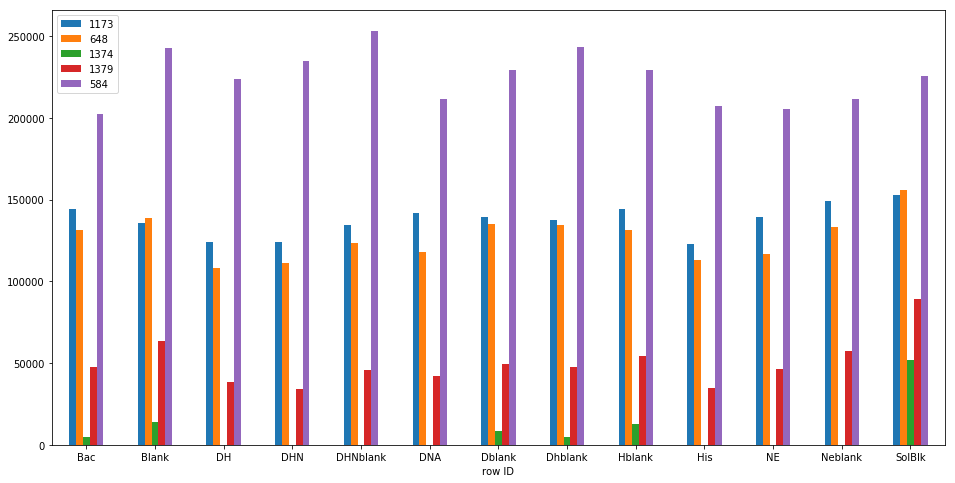

In [20]:
# Make a bar plot of the most variable feature in all samples
df_mean.loc[:, five_most_variable].plot.bar(rot=0, figsize=(16,8))

In [21]:
# Say you want to know what features have highest intensities in 
# a specific sample compared to all others. You can select
# the sample name changing all 'DHNs' in this cell
# and all change the number 5 to obtain more
idx_dhn = df_mean.apply(lambda a: sum(a['DHN'] > a[a.index!='DHN'])==12)
idx_dhn_max = df_mean.loc['DHN', idx_dhn].sort_values()[:5].index.tolist()

In [22]:
# inspect the ids
idx_dhn_max

['1192', '1253', '1306', '653', '609']

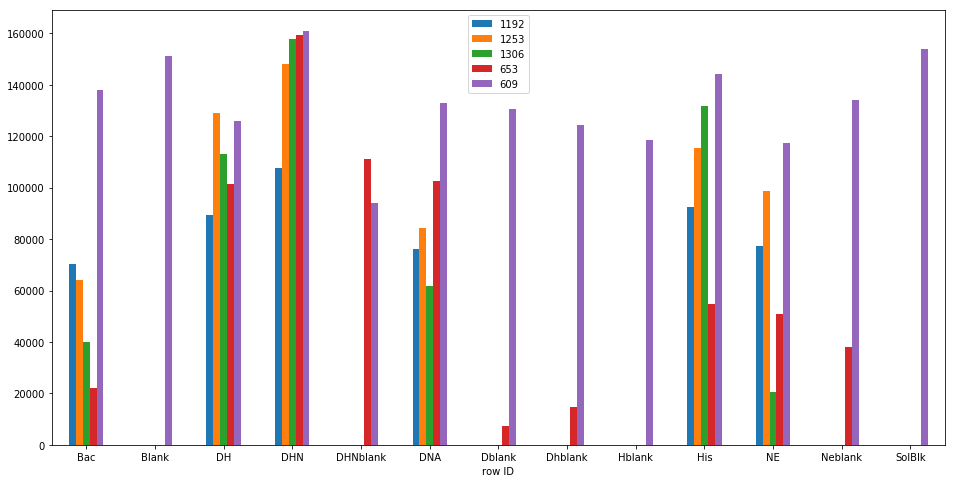

In [23]:
# bar plot as above, notive that all features have highest intensity in sample DHN
df_mean.loc[:, idx_dhn_max].plot.bar(rot=0, figsize=(16,8))

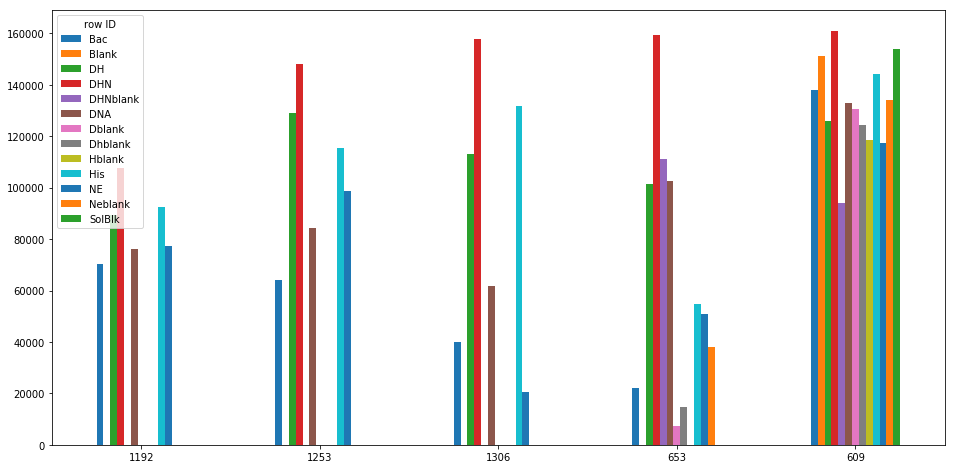

In [24]:
# invert the plot, easier to see that all features are higher in DHN
df_mean.loc[:, idx_dhn_max].T.plot.bar(rot=0, figsize=(16,8))